# Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn")

# Prepare Data

In [2]:
# load rent data
rent = pd.read_csv("rent.csv")

# means grouped by state and year
state_sy = rent.groupby(["state initials", "year"])["state initials"].first().to_list()
year_sy = rent.groupby(["state initials", "year"])["year"].first().to_list()
bed_0_sy = rent.groupby(["state initials", "year"]).mean()["rent50_0"].to_list()
bed_1_sy = rent.groupby(["state initials", "year"]).mean()["rent50_1"].to_list()
bed_2_sy = rent.groupby(["state initials", "year"]).mean()["rent50_2"].to_list()
bed_3_sy = rent.groupby(["state initials", "year"]).mean()["rent50_3"].to_list()
bed_4_sy = rent.groupby(["state initials", "year"]).mean()["rent50_4"].to_list()

rent_summary_sy = pd.DataFrame(
    {'State': state_sy, 'Year': year_sy, 'Studio': bed_0_sy, '1 Bedroom': bed_1_sy,
     '2 Bedroom': bed_2_sy, '3 Bedroom': bed_3_sy, '4 Bedroom': bed_4_sy}).round(2)

rent_summary_sy.head(3)

,State,Year,Studio,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom
0,AK,2019,930.55,1052.83,1314.41,1747.76,2005.48
1,AK,2020,969.03,1097.48,1370.17,1821.17,2065.79
2,AK,2021,908.03,1012.10,1281.31,1684.93,1937.86


# Studio Apartments

In [3]:
# studio data 2021
studio21DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2021]["State"], 
                         'Studio': rent_summary_sy[rent_summary_sy["Year"] == 2021]["Studio"]})
# studio data 2020
studio20DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2020]["State"], 
                         'Studio': rent_summary_sy[rent_summary_sy["Year"] == 2020]["Studio"]})  
# studio data 2019
studio19DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2019]["State"], 
                         'Studio': rent_summary_sy[rent_summary_sy["Year"] == 2019]["Studio"]})  
# studio data merge
studioDF = pd.merge(studio21DF, studio20DF, how="inner", on=["State"]).merge(studio19DF, on=["State"])
studioDF.columns = ['State','Studio21','Studio20','Studio19']

# studio data calculations
studioDF["'21 diff %"] = 100 * (studioDF["Studio21"] - studioDF["Studio20"]) / studioDF["Studio21"]
studioDF["'20 diff %"] = 100 * (studioDF["Studio20"] - studioDF["Studio19"]) / studioDF["Studio20"]

In [4]:
studioDF.head()

,State,Studio21,Studio20,Studio19,'21 diff %,'20 diff %
0,AK,908.03,969.03,930.55,-6.717840,3.970981
1,AL,579.79,563.24,559.96,2.854482,0.582345
2,AR,535.00,509.15,517.76,4.831776,-1.691054
3,AS,635.00,608.00,543.00,4.251969,10.690789
4,AZ,746.53,701.40,678.73,6.045303,3.232107


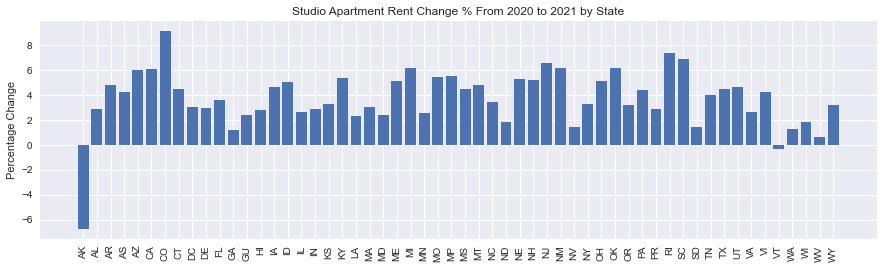

In [5]:
# prepare chart
states = studioDF["State"]
percentage = studioDF["'21 diff %"]

plt.figure(figsize=(15, 4))
plt.xticks(rotation = 90)
plt.bar(states, percentage)
plt.title('Studio Apartment Rent Change % From 2020 to 2021 by State')
plt.ylabel("Percentage Change")
plt.show()

# 1 Bedroom Apartments

In [6]:
# b1 data 2021
b121DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2021]["State"], 
                         '1 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2021]["1 Bedroom"]})
# b1 data 2020
b120DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2020]["State"], 
                         '1 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2020]["1 Bedroom"]})  
# b1 data 2019
b119DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2019]["State"], 
                         '1 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2019]["1 Bedroom"]})  
# b1 data merge
b1DF = pd.merge(b121DF, b120DF, how="inner", on=["State"]).merge(b119DF, on=["State"])
b1DF.columns = ['State',"1 Bedroom '21","1 Bedroom '20","1 Bedroom '19"]

# b1 data calculations
b1DF["'21 diff %"] = 100 * (b1DF["1 Bedroom '21"] - b1DF["1 Bedroom '20"]) / b1DF["1 Bedroom '21"]
b1DF["'20 diff %"] = 100 * (b1DF["1 Bedroom '20"] - b1DF["1 Bedroom '19"]) / b1DF["1 Bedroom '20"]

In [7]:
b1DF.head()

,State,1 Bedroom '21,1 Bedroom '20,1 Bedroom '19,'21 diff %,'20 diff %
0,AK,1012.10,1097.48,1052.83,-8.435925,4.068411
1,AL,626.04,607.66,601.84,2.935915,0.957772
2,AR,574.33,551.45,557.65,3.983772,-1.124309
3,AS,640.00,612.00,547.00,4.375000,10.620915
4,AZ,821.60,777.13,732.87,5.412610,5.695315


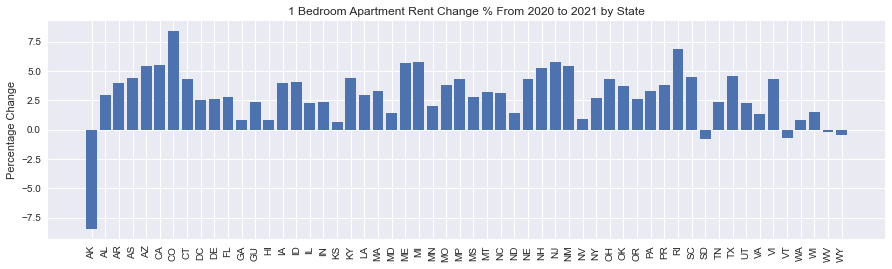

In [8]:
# prepare chart
states = b1DF["State"]
percentage = b1DF["'21 diff %"]

plt.figure(figsize=(15, 4))
plt.xticks(rotation = 90)
plt.bar(states, percentage)
plt.title('1 Bedroom Apartment Rent Change % From 2020 to 2021 by State')
plt.ylabel("Percentage Change")
plt.show()

# 2 Bedroom Apartments

In [13]:
# b2 data 2021
b221DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2021]["State"], 
                         '2 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2021]["2 Bedroom"]})
# b2 data 2020
b220DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2020]["State"], 
                         '2 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2020]["2 Bedroom"]})  
# b2 data 2019
b219DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2019]["State"], 
                         '2 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2019]["2 Bedroom"]})  
# b2 data merge
b2DF = pd.merge(b221DF, b220DF, how="inner", on=["State"]).merge(b219DF, on=["State"])
b2DF.columns = ['State',"2 Bedroom '21","2 Bedroom '20","2 Bedroom '19"]

# b2 data calculations
b2DF["'21 diff %"] = 100 * (b2DF["2 Bedroom '21"] - b2DF["2 Bedroom '20"]) / b2DF["2 Bedroom '21"]
b2DF["'20 diff %"] = 100 * (b2DF["2 Bedroom '20"] - b2DF["2 Bedroom '19"]) / b2DF["2 Bedroom '20"]

In [14]:
b2DF.head()

,State,2 Bedroom '21,2 Bedroom '20,2 Bedroom '19,'21 diff %,'20 diff %
0,AK,1281.31,1370.17,1314.41,-6.935090,4.069568
1,AL,767.42,739.43,736.88,3.647286,0.344860
2,AR,723.04,695.19,709.75,3.851792,-2.094391
3,AS,843.00,806.00,723.00,4.389087,10.297767
4,AZ,1037.53,980.20,935.40,5.525623,4.570496


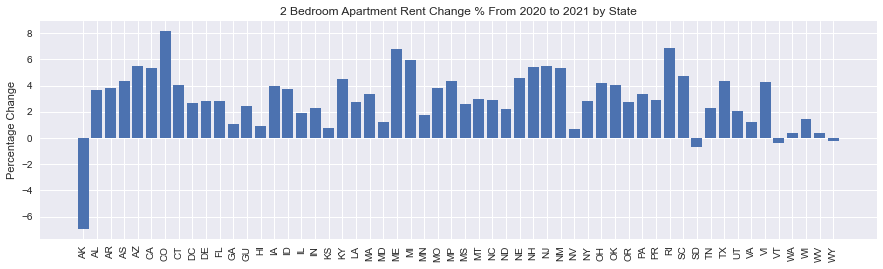

In [15]:
# prepare chart
states = b2DF["State"]
percentage = b2DF["'21 diff %"]

plt.figure(figsize=(15, 4))
plt.xticks(rotation = 90)
plt.bar(states, percentage)
plt.title('2 Bedroom Apartment Rent Change % From 2020 to 2021 by State')
plt.ylabel("Percentage Change")
plt.show()

## 3 Bedroom Apartments

In [16]:
# b3 data 2021
b321DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2021]["State"], 
                         '3 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2021]["3 Bedroom"]})
# b3 data 2020
b320DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2020]["State"], 
                         '3 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2020]["3 Bedroom"]})  
# b3 data 2019
b319DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2019]["State"], 
                         '3 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2019]["3 Bedroom"]})  
# b3 data merge
b3DF = pd.merge(b321DF, b320DF, how="inner", on=["State"]).merge(b319DF, on=["State"])
b3DF.columns = ['State',"3 Bedroom '21","3 Bedroom '20","3 Bedroom '19"]

# b3 data calculations
b3DF["'21 diff %"] = 100 * (b3DF["3 Bedroom '21"] - b3DF["3 Bedroom '20"]) / b3DF["3 Bedroom '21"]
b3DF["'20 diff %"] = 100 * (b3DF["3 Bedroom '20"] - b3DF["3 Bedroom '19"]) / b3DF["3 Bedroom '20"]

In [17]:
b3DF.head()

,State,3 Bedroom '21,3 Bedroom '20,3 Bedroom '19,'21 diff %,'20 diff %
0,AK,1684.93,1821.17,1747.76,-8.085796,4.030925
1,AL,1003.73,975.01,977.49,2.861327,-0.254356
2,AR,954.23,919.33,938.77,3.657399,-2.114583
3,AS,1206.00,1163.00,1045.00,3.565506,10.146174
4,AZ,1433.00,1363.67,1296.73,4.838102,4.908812


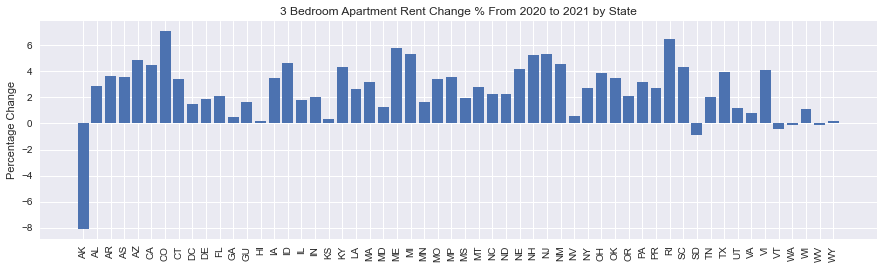

In [19]:
# prepare chart
states = b3DF["State"]
percentage = b3DF["'21 diff %"]

plt.figure(figsize=(15, 4))
plt.xticks(rotation = 90)
plt.bar(states, percentage)
plt.title('3 Bedroom Apartment Rent Change % From 2020 to 2021 by State')
plt.ylabel("Percentage Change")
plt.show()

## 4 Bedroom Apartments

In [20]:
# b4 data 2021
b421DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2021]["State"], 
                         '4 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2021]["4 Bedroom"]})
# b4 data 2020
b420DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2020]["State"], 
                         '4 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2020]["4 Bedroom"]})  
# b4 data 2019
b419DF = pd.DataFrame({'State': rent_summary_sy[rent_summary_sy["Year"] == 2019]["State"], 
                         '4 Bedroom': rent_summary_sy[rent_summary_sy["Year"] == 2019]["4 Bedroom"]})  
# b4 data merge
b4DF = pd.merge(b421DF, b420DF, how="inner", on=["State"]).merge(b419DF, on=["State"])
b4DF.columns = ['State',"4 Bedroom '21","4 Bedroom '20","4 Bedroom '19"]

# b4 data calculations
b4DF["'21 diff %"] = 100 * (b4DF["4 Bedroom '21"] - b4DF["4 Bedroom '20"]) / b4DF["4 Bedroom '21"]
b4DF["'20 diff %"] = 100 * (b4DF["4 Bedroom '20"] - b4DF["4 Bedroom '19"]) / b4DF["4 Bedroom '20"]

In [21]:
b4DF.head()

,State,4 Bedroom '21,4 Bedroom '20,4 Bedroom '19,'21 diff %,'20 diff %
0,AK,1937.86,2065.79,2005.48,-6.601612,2.919464
1,AL,1157.03,1121.51,1128.43,3.069929,-0.617025
2,AR,1104.27,1064.85,1086.59,3.569779,-2.041602
3,AS,1293.00,1236.00,1109.00,4.408353,10.275081
4,AZ,1596.93,1527.33,1467.07,4.358363,3.945447


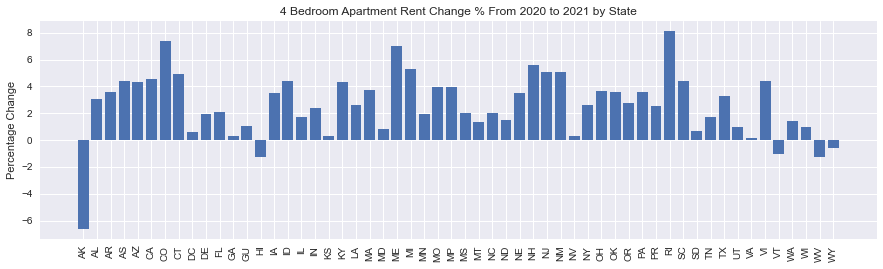

In [22]:
# prepare chart
states = b4DF["State"]
percentage = b4DF["'21 diff %"]

plt.figure(figsize=(15, 4))
plt.xticks(rotation = 90)
plt.bar(states, percentage)
plt.title('4 Bedroom Apartment Rent Change % From 2020 to 2021 by State')
plt.ylabel("Percentage Change")
plt.show()